<a href="https://colab.research.google.com/github/jmmiddour/DS-Unit-1-Sprint-2-Statistics/blob/master/module2/LS_DS_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


### Confidence Intervals:

In [1]:
# Import my libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_1samp, ttest_ind, chisquare, t
import scipy.stats as stats

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Get the dataset:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2020-05-26 02:29:03--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data.1’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.06s   

2020-05-26 02:29:03 (286 KB/s) - ‘house-votes-84.data.1’ saved [18171/18171]



In [3]:
# Make it into a dataframe:
column_headers = ['Party','Handicapped-Infants','Water-Project',
                          'Budget','Physician-Fee-Freeze', 'El-Salvador-Aid',
                          'Religious-Groups','Anti-Satellite-Ban',
                          'Aid-to-Contras','Mx-Missile','Immigration',
                          'Synfuels', 'Education', 'Right-to-Sue','Crime','Duty-Free',
                          'South-Africa']

# You can see right away that the missing values were coded with a ?. To remove
#   those and set them to NaN values, need to add na_values='?':
house = pd.read_csv('house-votes-84.data', header=None, names=column_headers, 
                    na_values='?')
house.head()


,Party,Handicapped-Infants,Water-Project,Budget,Physician-Fee-Freeze,El-Salvador-Aid,Religious-Groups,Anti-Satellite-Ban,Aid-to-Contras,Mx-Missile,Immigration,Synfuels,Education,Right-to-Sue,Crime,Duty-Free,South-Africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [4]:
# Recode votes as numerical values:
house = house.replace({'y': 1, 'n': 0})

# Check my work by looking at the first 5 row:
house.head()

,Party,Handicapped-Infants,Water-Project,Budget,Physician-Fee-Freeze,El-Salvador-Aid,Religious-Groups,Anti-Satellite-Ban,Aid-to-Contras,Mx-Missile,Immigration,Synfuels,Education,Right-to-Sue,Crime,Duty-Free,South-Africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [5]:
# Check value counts on Party:
house['Party'].value_counts()

democrat      267
republican    168
Name: Party, dtype: int64

In [6]:
# Remove NaN values:
house = house.dropna()

# Check my work:
house.isnull().sum()

Party                   0
Handicapped-Infants     0
Water-Project           0
Budget                  0
Physician-Fee-Freeze    0
El-Salvador-Aid         0
Religious-Groups        0
Anti-Satellite-Ban      0
Aid-to-Contras          0
Mx-Missile              0
Immigration             0
Synfuels                0
Education               0
Right-to-Sue            0
Crime                   0
Duty-Free               0
South-Africa            0
dtype: int64

In [7]:
# Subset Democrat votes:
dem = house[house['Party'] == 'democrat']

# Subset Republican votes:
rep = house[house['Party'] == 'republican']

# Check my work:
print (dem.sample(3))
print (rep.sample(3))

        Party  Handicapped-Infants  ...  Duty-Free  South-Africa
320  democrat                  0.0  ...        0.0           1.0
139  democrat                  1.0  ...        1.0           1.0
90   democrat                  1.0  ...        1.0           1.0

[3 rows x 17 columns]
          Party  Handicapped-Infants  ...  Duty-Free  South-Africa
345  republican                  0.0  ...        1.0           1.0
253  republican                  0.0  ...        0.0           1.0
379  republican                  0.0  ...        0.0           1.0

[3 rows x 17 columns]


#### Part 1:
Generate and numerically represent a confidence interval.

In [8]:
# Value counts and means of votes on Aid-to-Contras:
print (dem['Aid-to-Contras'].value_counts())
print (rep['Aid-to-Contras'].value_counts())
print ('')
print ('Average of yes votes on Aid-to-Contras:')
print ('Dems:', dem['Aid-to-Contras'].mean())
print ('Reps', rep['Aid-to-Contras'].mean())

1.0    103
0.0     21
Name: Aid-to-Contras, dtype: int64
0.0    92
1.0    16
Name: Aid-to-Contras, dtype: int64

Average of yes votes on Aid-to-Contras:
Dems: 0.8306451612903226
Reps 0.14814814814814814


In [9]:
# Run ttest on Aid-to-Contras:
ttest_ind(dem['Aid-to-Contras'], rep['Aid-to-Contras'])

Ttest_indResult(statistic=14.107516419917083, pvalue=5.607962900152492e-33)

- Based on a t-value of 14.107516419917083 and a p-value of ~0.00:
  - I reject the Null Hypothesis and suggest the Alternate Hypothesis because there is a significant difference in the population between Democrats and Republicans on this bill.

In [0]:
# Create a function to calculate my confidence interval:
def confidence_interval(data, confidence=0.95):
    # Convert the data to an array.
    data = np.array(data)
    # The mean of the data.
    mean = np.mean(data)
    # Lenth of the sample data.
    n = len(data)
    # Standard Diviation error.
    stderr = np.std(data, ddof=1)/np.sqrt(n)
    # Margin of Error:
    moe = stderr * stats.t.ppf((1 + confidence) / 2.0, n - 1) 
    # Returns the Mean, Lower Bound, Upper Bound.
    return (mean, mean - moe, mean + moe)

In [11]:
# Look at the mean, lower bounds, and upper bounds seperately:
mean, lower, upper = confidence_interval(dem['Aid-to-Contras'])
print ('Democrats')
print ('Mean: ', mean)
print ('Lower Bounds: ', lower)
print ('Upper Bounds: ', upper)
print ('')
mean, lower, upper = confidence_interval(rep['Aid-to-Contras'])
print ('Republicans')
print ('Mean: ', mean)
print ('Lower Bounds: ', lower)
print ('Upper Bounds: ', upper)

Democrats
Mean:  0.8306451612903226
Lower Bounds:  0.7637035637475735
Upper Bounds:  0.8975867588330717

Republicans
Mean:  0.14814814814814814
Lower Bounds:  0.08006715123831286
Upper Bounds:  0.2162291450579834


In [12]:
# Find the margin of error:
print ('Democrats:')
print ('MOE: ', 0.8975867588330717 - 0.8306451612903226)
print ('')
print ('Republicans:')
print ('MOE: ', 0.2162291450579834 - 0.14814814814814814)

Democrats:
MOE:  0.06694159754274909

Republicans:
MOE:  0.06808099690983527


#### Part 2:
Graphically (with a plot) represent the confidence interval.

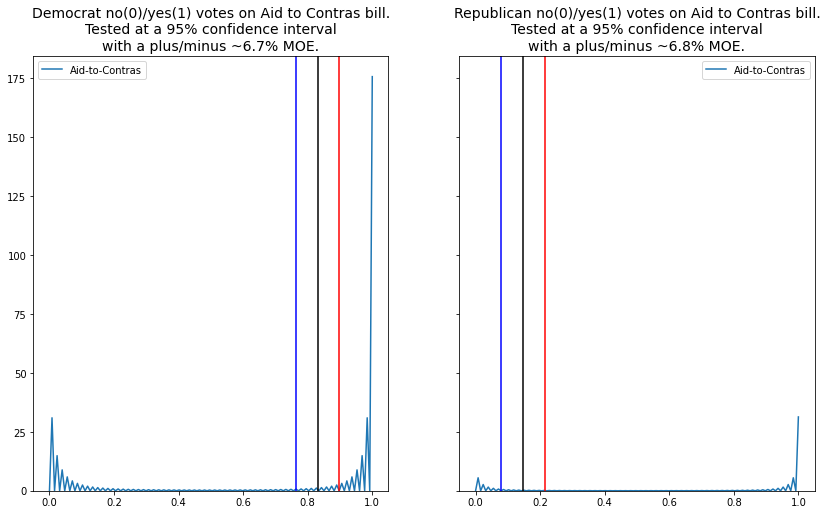

In [13]:
# Plot my confidence interval for both the Democrat and Republican votes:
# Create an empty figure:
fig = []
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(14, 8), facecolor='white')
dem_aid = dem['Aid-to-Contras']
rep_aid = rep['Aid-to-Contras']
# Plot using a KDE plot:
sns.kdeplot(dem_aid, ax=ax1)
sns.kdeplot(rep_aid, ax=ax2)
# Create a variable for my confidence intervals:
CI1 = confidence_interval(dem['Aid-to-Contras'])
CI2 = confidence_interval(rep['Aid-to-Contras'])
# Plot my lower bounds:
ax1.axvline(x=CI1[1], color='blue')
ax2.axvline(x=CI2[1], color='blue')
# Plot my sample means:
ax1.axvline(x=CI1[0], color='black')
ax2.axvline(x=CI2[0], color='black')
# Plot my upper bounds:
ax1.axvline(x=CI1[2], color='red')
ax2.axvline(x=CI2[2], color='red')
# Add titles to my plots:
ax1.set_title('Democrat no(0)/yes(1) votes on Aid to Contras bill.\nTested at a 95% confidence interval\nwith a plus/minus ~6.7% MOE.',
              fontsize=14)
ax2.set_title('Republican no(0)/yes(1) votes on Aid to Contras bill.\nTested at a 95% confidence interval\nwith a plus/minus ~6.8% MOE.',
              fontsize=14);

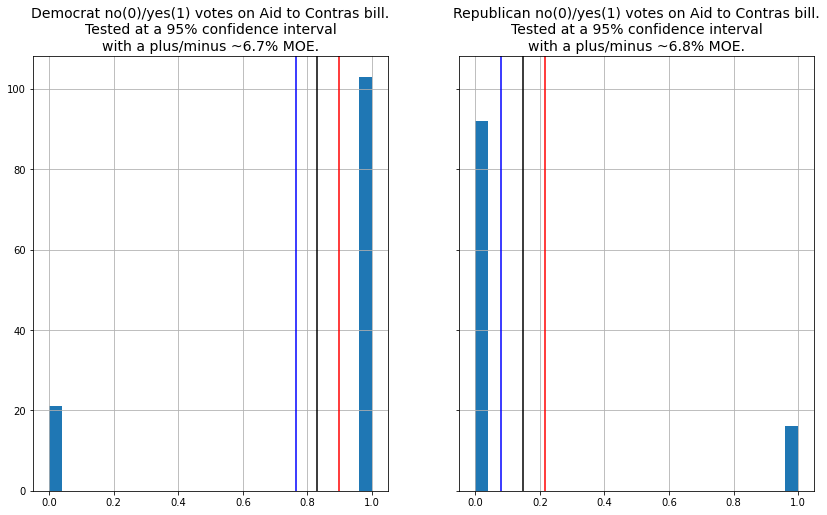

In [14]:
# Plot using a histogram:
# Create an empty figure:
fig = []
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(14, 8), facecolor='white')
# Plot using a histogram:
dem_aid.hist (bins=25, ax=ax1)
rep_aid.hist (bins=25, ax=ax2)
# Create a variable for my confidence intervals:
CI1 = confidence_interval(dem['Aid-to-Contras'])
CI2 = confidence_interval(rep['Aid-to-Contras'])
# Plot my lower bounds:
ax1.axvline(x=CI1[1], color='blue')
ax2.axvline(x=CI2[1], color='blue')
# Plot my sample means:
ax1.axvline(x=CI1[0], color='black')
ax2.axvline(x=CI2[0], color='black')
# Plot my upper bounds:
ax1.axvline(x=CI1[2], color='red')
ax2.axvline(x=CI2[2], color='red')
# Add titles to my plots:
ax1.set_title('Democrat no(0)/yes(1) votes on Aid to Contras bill.\nTested at a 95% confidence interval\nwith a plus/minus ~6.7% MOE.',
              fontsize=14)
ax2.set_title('Republican no(0)/yes(1) votes on Aid to Contras bill.\nTested at a 95% confidence interval\nwith a plus/minus ~6.8% MOE.',
              fontsize=14);

#### Part 3: 
Interpret the confidence interval - what does it tell you about the data and its distribution?

- My findings of a yes vote on the Aid to Contras bill by Democrats and Republicans, based on a 95% confidence interval :
  
  - The probability that Democrats would vote yes on the Aid to Contras bill is 0.8306451612903226 (~ 83%) with a margin of error plus or minus 0.06694159754274909 (~ 6.7%). This tells me that it is very likely that the Democrats as a whole would vote yes on this bill.

  - The probability that Republicans would vote yes on the Aid to Contras bill is 0.14814814814814814 (~ 14.8%) with a margin of error plus or minus 0.06808099690983527 (~ 6.8%). This tells me that it is very unlikely that the Republicans as a whole would vote yes on this bill.

### Chi-squared tests:

#### Part 4:
Take a dataset that we have used in the past in class that has categorical variables. Pick two of those categorical variables and run a chi-squared tests on that data.

In [15]:
# Read in the "Adult" dataset and replace " ?" with NaN:
adult = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv', na_values = ' ?')

# Get the size and first 5 rows of the dataset:
print (adult.shape)
adult.head()

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [16]:
# Find the categorical varibles
adult.describe(exclude='number')

,workclass,education,marital-status,occupation,relationship,race,sex,country,salary
count,30725,32561,32561,30718,32561,32561,32561,31978,32561
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


##### By hand using Numpy:

I want to know if there is a relationship between the workclass and sex/gender of person in this sample dataset.
  
  - If there is a relationship, I will say that the variables are "dependent".

  - If there is no relationship, I will say that the variables are "independent".
  

In [26]:
# Create a contingency table using crosstab to compare workclass and sex with 
#   column and row totals:
obs_freq = pd.crosstab(adult['workclass'], adult['sex'], margins=True)
obs_freq

sex,Female,Male,All
workclass,,,
Federal-gov,315,645,960
Local-gov,835,1258,2093
Never-worked,2,5,7
Private,7752,14944,22696
Self-emp-inc,135,981,1116
Self-emp-not-inc,399,2142,2541
State-gov,489,809,1298
Without-pay,5,9,14
All,9932,20793,30725


In [27]:
# Create a contingency table:
observed = pd.crosstab(adult['workclass'], adult['sex'])

# Need to make it a np.array:
observed = observed.values
observed

array([[  315,   645],
       [  835,  1258],
       [    2,     5],
       [ 7752, 14944],
       [  135,   981],
       [  399,  2142],
       [  489,   809],
       [    5,     9]])

In [29]:
# Create an expected value table of row totals as a np.array:
row_sums = obs_freq.iloc[0:8, 2:].values

# Reshape to a 1-d array:
row_sums = row_sums.T[0]
row_sums

array([  960,  2093,     7, 22696,  1116,  2541,  1298,    14])

In [31]:
# Create an expected value table of column totals as a np.array:
col_sums = obs_freq.iloc[8:, 0:2].values

# Reshape to a 1-d array:
col_sums = col_sums[0]
col_sums

array([ 9932, 20793])

In [32]:
# Create a np.array for the total observations of the sample size:
samp_sum = adult.shape[0]
samp_sum

32561

In [34]:
# Create a for loop to get the expected values if the Null Hypothesis were true:
# Create an empty list for the data:
expected = []
# Create my for loop:
for i in range(len(row_sums)):
  expected_row = []
  for column in col_sums:
    expected_val = row_sums[i]*column/samp_sum 
    expected_row.append(expected_val)
  expected.append(expected_row)

# Make into a np.array:
expected = np.array(expected)
print (expected.shape)
print (expected)

(8, 2)
[[2.92826387e+02 6.13042597e+02]
 [6.38422530e+02 1.33656058e+03]
 [2.13519241e+00 4.47010227e+00]
 [6.92290384e+03 1.44933487e+04]
 [3.40410675e+02 7.12662019e+02]
 [7.75074844e+02 1.62264712e+03]
 [3.95925678e+02 8.28884678e+02]
 [4.27038482e+00 8.94020454e+00]]


In [35]:
# Calculate the degrees of freedom (rows - 1) * (cols - 1):
dof = 7 * 1
dof

7

In [38]:
# Calculate the chi^2 statistic:
chi2 = ((observed-expected)**2 / expected).sum()
chi2

778.0389114565598

##### In a single line using Scipy:

In [39]:
# Check my work by using chi^2 contingency from scipy:
chi2, p_value, dof, expected = stats.chi2_contingency(observed)

# Print all of these to check my work:
print ('chi2 value: ', chi2)
print ('P-Value: ', p_value)
print ('DOF: ', dof)
print ('Expected Values:')
print (expected)

chi2 value:  636.4799145064011
P-Value:  3.379617448830285e-133
DOF:  7
Expected Values:
[[3.10324491e+02 6.49675509e+02]
 [6.76572042e+02 1.41642796e+03]
 [2.26278275e+00 4.73721725e+00]
 [7.33658819e+03 1.53594118e+04]
 [3.60752221e+02 7.55247779e+02]
 [8.21390138e+02 1.71960986e+03]
 [4.19584573e+02 8.78415427e+02]
 [4.52556550e+00 9.47443450e+00]]


## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

#### Part 1:

Write a summary of your findings, mixing prose and math/code/results. Note - yes, this is by definition a political topic. It is challenging but important to keep your writing voice neutral and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).

##### My Reuslts:

I was curious as to what the yes votes were compared to the no votes on the Aid to Contras bill in 1984. I wanted to see what the difference was between the way the Democrats voted vs how the Republicans voted. I also wanted to see, based on this being just a sample, what how confident I could be that one or the other would vote yes on the bill.

First I had to get the data from the UCI website and laod it into my Colab notebook. I had to also add the headers of the columns as per the UCI website. Then it was time to clean my data. 

In order to make my data usable for the testing I planned on using, I remapped the "?" entries with NaN values. Next I had to remove thoses NaN values in order to run my hypothesis testing. I also had to subset out the dataset to seperate the Democrat and Republican votes. I needed to change the y's to 1's and n's to 0's to give me binary values because I could not run my tests with strings.

The hypothesis testing that I used included:
  - Getting the count of the frequency of how many times each party voted on this particular bill.
  - I got the mean (average) of yes and no votes for each party to get a good idea of who voted yes more times. The mean is calculated by taking the sum of the yes votes and dividing that by the total of all votes for that party.
  - I ran a t-test to determine if the Null Hypothesis held up according to the p-value. My findings are:
    - Based on a t-value of 14.107516419917083 and a p-value of ~0.00:
    - I reject the Null Hypothesis and suggest the Alternate Hypothesis because there is a significant difference in the population between Democrats and Republicans on this bill.
  - I then ran a Confidence Interval test to find out if I could be at least 95% confident that the democrats as a whole would vote mostly yes on this bill, had this been random sample data. My findings are:
    - Based on a 95% confidence interval:
    - The probability that Democrats would vote yes on the Aid to Contras bill is 0.8306451612903226 (~ 83%) with a margin of error plus or minus 0.06694159754274909 (~ 6.7%). This tells me that it is very likely that the Democrats as a whole would vote yes on this bill.
    - The probability that Republicans would vote yes on the Aid to Contras bill is 0.14814814814814814 (~ 14.8%) with a margin of error plus or minus 0.06808099690983527 (~ 6.8%). This tells me that it is very unlikely that the Republicans as a whole would vote yes on this bill.
  - The final hypothesis test I ran was the margin of error (MOE) to determine how much room there would be for error in my predictions of how the population as a whole would vote. In order to determing the MOE, I had to substract the mean from the upper limit.

After I ran all of my hypothesis testing, I created two visualization to better view my findings:

This first one was using a KDE plot within a subplot so I could create a visual comparison of the different ways that each party voted, side by side. I also included the lower limit, mean, and upper limit for each party based on my confidence interval.

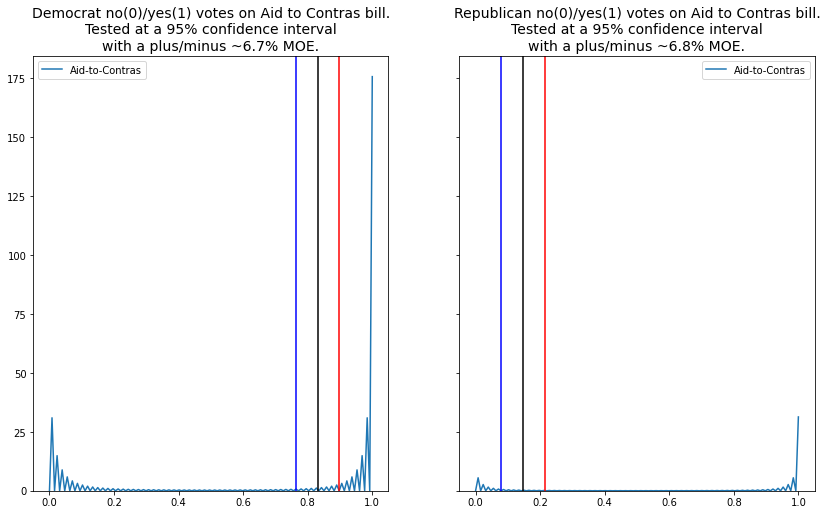

The second one show the differences using a bar chart within a subplot. I included the lower limit, mean, and upper limit for each party based on my confidence interval.

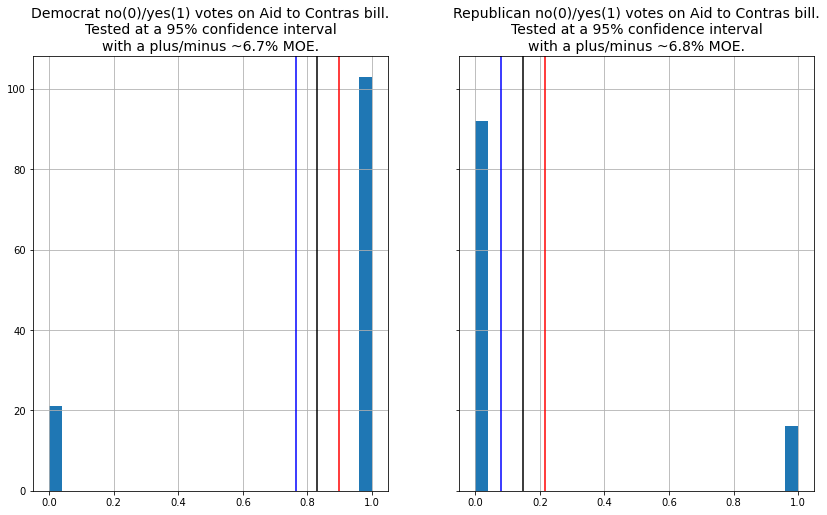

In conclusion, based on my findings, I strongly believe the Democrats as a whole would be very likely to vote yes on this bill.

#### Part 2:

Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.

#### Part 3:

Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)